# Assignment: Convolutional Neural Networks (CNN) for Image Processing
### - Student Name: Oscar Quintero
### - Student Id: c0922321

1. Loading the data using kaegle API

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("puneet6060/intel-image-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\oscar\.cache\kagglehub\datasets\puneet6060\intel-image-classification\versions\2


Importing the necessary libraries

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt



### Training set
* ImageDataGenerator creates a data augmentation generator it will automatically apply transformations to the training images on the fly to help the model generalize better.
* rescale=1./255
    * Normalizes pixel values from [0, 255] to [0, 1] (neural networks work better with small inputs).

* shear_range=0.2
    * Randomly applies shear transformations (like slanting the image).

* zoom_range=0.2
    * Randomly zooms inside the image (between 80%–120%).

* horizontal_flip=True
    * Randomly flips images horizontally (good for natural images where orientation doesn’t matter).

* validation_split=0.2
    * Keeps 20% of the data for validation, and 80% for training (handled in the next step with subset='training').




##### flow_from_directory(...)
* f'{path}/seg_train'
  * Path the training image folder, which is structured like:

- seg_train/
  - ├── buildings/
  - ├── forest/
  - ├── glacier/
  - ├── mountain/
  - ├── sea/
  - └── street/

* target_size=(150, 150)
  * Resizes all images to this size, so they’re the same shape.

* batch_size=32
  * Feeds the model 32 images at a time.

* class_mode='categorical'
  * Returns one-hot encoded labels for multi-class classification .

* subset='training'
  * Uses the 80% training portion of the data (the rest will be used for validation using subset='validation' elsewhere).

In [13]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  
)

# Training set
training_set = train_datagen.flow_from_directory(
    f'{path}/seg_train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  )

Found 11230 images belonging to 6 classes.


##### Validation data

In [14]:
# Validation set
validation_set = train_datagen.flow_from_directory(
    f'{path}/seg_train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2804 images belonging to 6 classes.


##### Testing set

In [15]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale =1./255,
                                   shear_range = 0.2,
                                   zoom_range= 0.2,
                                   horizontal_flip = True)

test_set = test_datagen.flow_from_directory(f'{path}/seg_test',
                                                 target_size= (150,150),
                                                 batch_size= 32,
                                                 class_mode='categorical',
                                                shuffle=False )

Found 3000 images belonging to 6 classes.


### Model building
* we are  building a Convolutional Neural Network (CNN) using Keras Sequential API to classify images into 6 classes using  the Intel Image Classification dataset

* Convolutional layers (Conv2D) are used to extract features from the input images.

* Pooling layers (MaxPooling2D) reduce the spatial dimensions of the feature maps.

* Dense layers are used to connect the flattened feature maps to the output layer.

* Dropout layers are used to prevent overfitting.

* Batch Normalization layers normalize the input layer by subtracting the mean and dividing by the standard deviation.

* The model is compiled with Adam optimizer and categorical cross-entropy loss function.



In [16]:
import tensorflow as tf

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=None, input_shape=(150,150,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Dense(6, activation='softmax')  # 6 classes
])


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 75, 75, 64)      

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(
    training_set,
    epochs=20,
    validation_data =validation_set,
    batch_size= 32
)

Epoch 1/20
351/351 [==============================] - 41s 113ms/step - loss: 0.8210 - accuracy: 0.6981 - val_loss: 2.5417 - val_accuracy: 0.2240
Epoch 2/20
351/351 [==============================] - 41s 116ms/step - loss: 0.6050 - accuracy: 0.7755 - val_loss: 0.6668 - val_accuracy: 0.7496
Epoch 3/20
351/351 [==============================] - 41s 118ms/step - loss: 0.5240 - accuracy: 0.8088 - val_loss: 0.7460 - val_accuracy: 0.7183
Epoch 4/20
351/351 [==============================] - 39s 112ms/step - loss: 0.4713 - accuracy: 0.8285 - val_loss: 1.1563 - val_accuracy: 0.5984
Epoch 5/20
351/351 [==============================] - 40s 114ms/step - loss: 0.4309 - accuracy: 0.8419 - val_loss: 0.6091 - val_accuracy: 0.7864
Epoch 6/20
351/351 [==============================] - 40s 115ms/step - loss: 0.3951 - accuracy: 0.8587 - val_loss: 0.6969 - val_accuracy: 0.7507
Epoch 7/20
351/351 [==============================] - 40s 115ms/step - loss: 0.3649 - accuracy: 0.8693 - val_loss: 0.5522 - val_ac

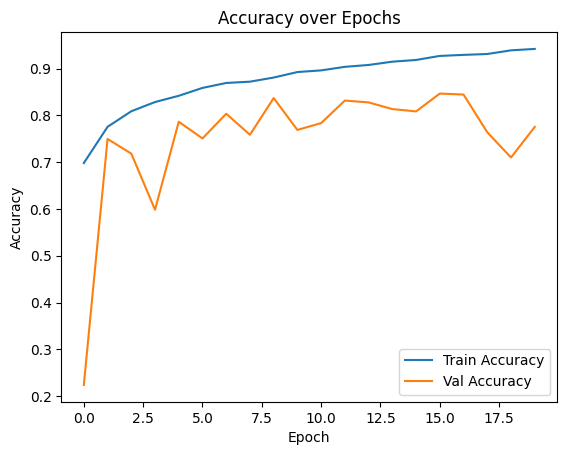

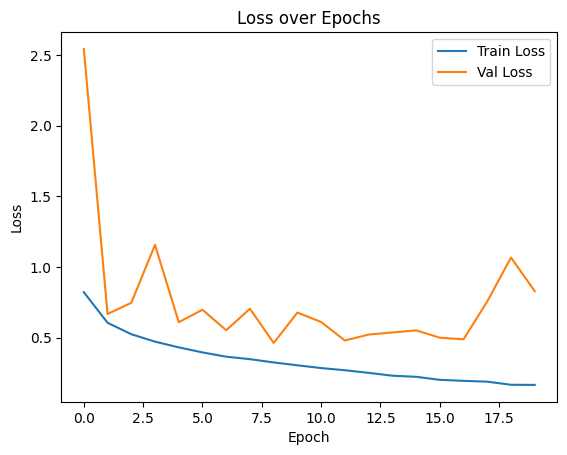

In [20]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluation Metrics

In [21]:
test_loss, test_accuracy = model.evaluate(test_set, verbose=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

94/94 [==============================] - 9s 91ms/step - loss: 0.8672 - accuracy: 0.7553
Test Loss: 0.8672361373901367
Test Accuracy: 0.7553333044052124


In [22]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict
y_pred = model.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_set.classes
class_labels = list(test_set.class_indices.keys())

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


94/94 [==============================] - 8s 86ms/step
              precision    recall  f1-score   support

   buildings       0.53      0.92      0.67       437
      forest       0.96      0.93      0.94       474
     glacier       0.93      0.47      0.63       553
    mountain       0.77      0.66      0.71       525
         sea       0.78      0.81      0.80       510
      street       0.78      0.79      0.79       501

    accuracy                           0.75      3000
   macro avg       0.79      0.76      0.75      3000
weighted avg       0.79      0.75      0.75      3000



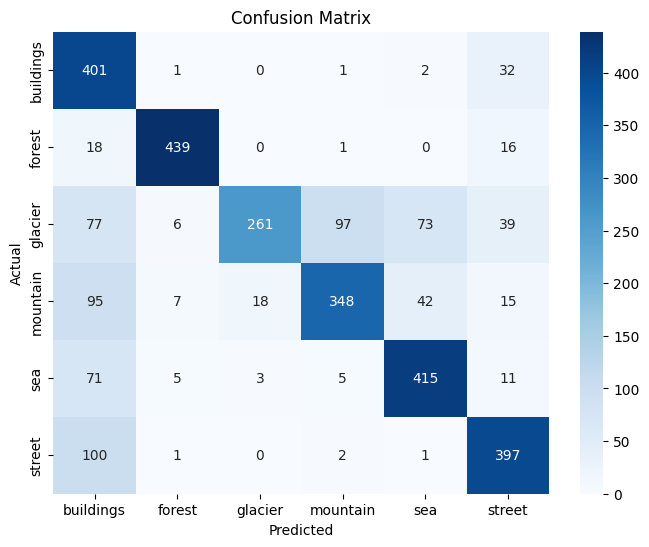

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

* test_set[30] grabs the 31st batch from the test set.

* sample_img[0] takes the first image in that batch.

* reshape(1, 150, 150, 3) adds a batch dimension so the model can process it (models expect shape [batch_size, height, width, channels]).
* We go through all layers of the model and collect those that are Conv2D.

* We take the first one (layer_outputs[0]) — this is ehe target for visualization.

* Then We create a new Model that has the same input as the trained model, but outputs the activations (feature maps) of that first Conv2D layer.

#### feature_maps = activation_model.predict(img)

* This feeds the image through the model up to the first Conv2D layer, and returns the resulting feature maps.

* The shape of feature_maps is likely [1, 150, 150, 32] → 32 feature maps of size 150x150.

In [24]:
from tensorflow.keras.models import Model

# Pick a sample image
sample_img, _ = test_set[30] 
img = sample_img[0].reshape(1, 150, 150, 3)

# new model that outputs the activations of the first Conv2D layer
layer_outputs = [layer.output for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
activation_model = Model(inputs=model.input, outputs=layer_outputs[0])

# Get feature maps
feature_maps = activation_model.predict(img)

# Plot the first 16 feature maps
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('First Conv Layer Feature Maps')
plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 41ms/step


In [25]:
def visualize_feature_maps(model, img_array, layers_to_show=3):
    conv_layers = [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
    
    for idx, conv_layer in enumerate(conv_layers[:layers_to_show]):
        activation_model = Model(inputs=model.input, outputs=conv_layer.output)
        feature_maps = activation_model.predict(img_array)

        plt.figure(figsize=(12, 12))
        for i in range(min(16, feature_maps.shape[-1])):
            plt.subplot(4, 4, i + 1)
            plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
            plt.axis('off')
        plt.suptitle(f'Feature Maps from Conv Layer {idx + 1}')
        plt.tight_layout()
        plt.show()

# Example usage
sample_img, _ = test_set[30]
img_array = sample_img[1].reshape(1, 150, 150, 3)
visualize_feature_maps(model, img_array, layers_to_show=3)


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 61ms/step


#### missclassified images

C:\Users\oscar\AppData\Local\Temp\ipykernel_22272\2726024069.py:19: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\oscar\anaconda3\envs\py310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


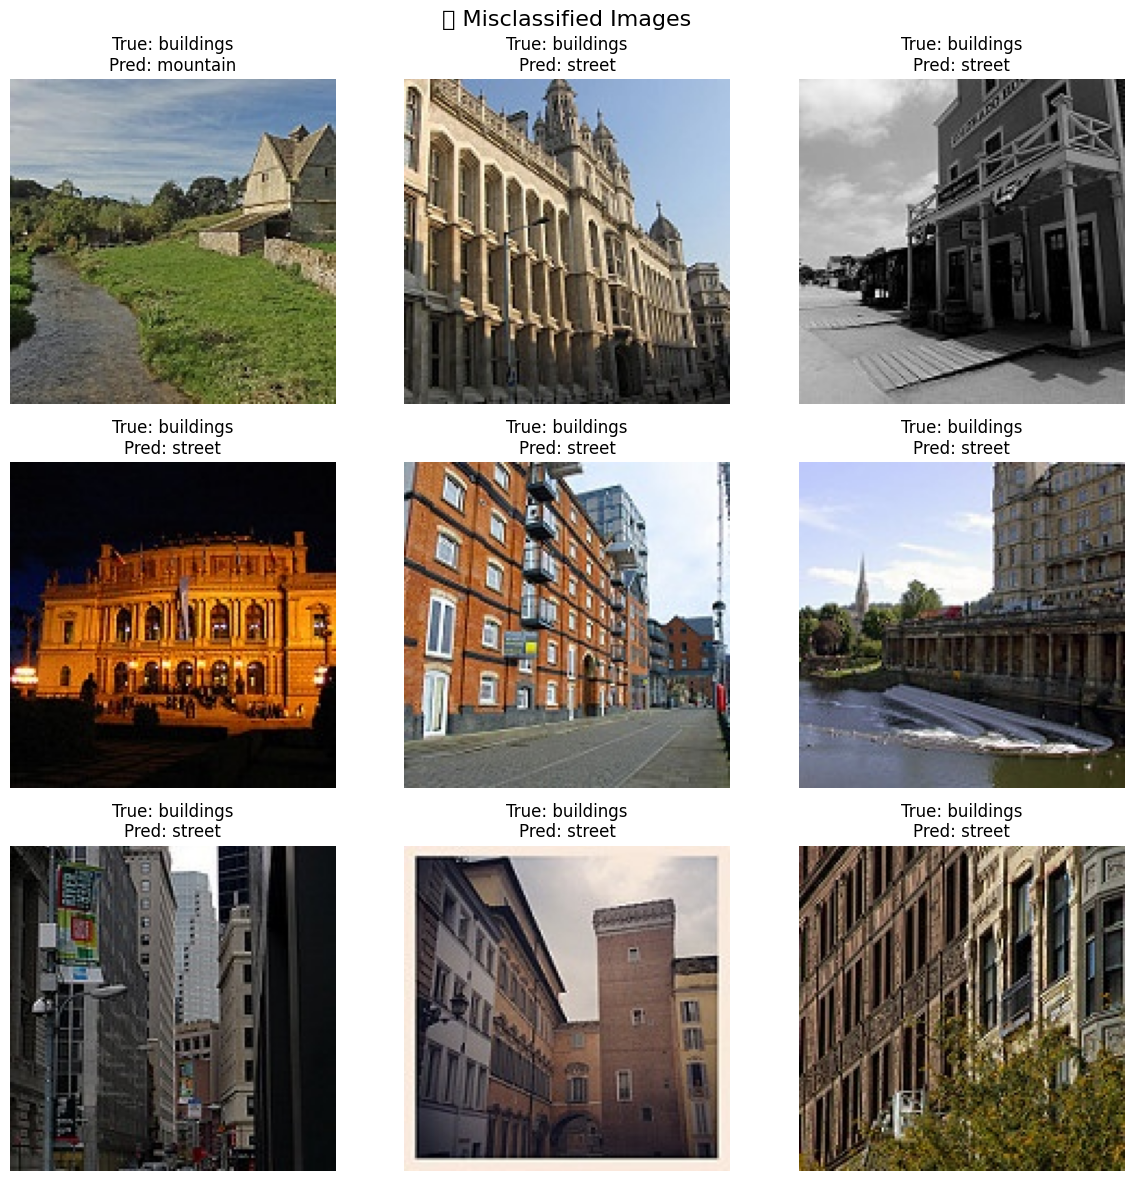

In [ ]:
from tensorflow.keras.preprocessing import image

plt.figure(figsize=(12, 12))

for i, idx in enumerate(misclassified_indexes[:9]):
    # Load the file path directly
    img_path = test_set.filepaths[idx]
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_array)
    plt.title(f"True: {class_labels[y_true[idx]]}\nPred: {class_labels[y_pred_classes[idx]]}")
    plt.axis('off')

plt.suptitle("Misclassified Images", fontsize=16)
plt.tight_layout()
plt.show()


# github repository: https://github.com/Odquinteroc/Image-Clasification